# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://data.mendeley.com/datasets/wj9rwkp9c2/1 

Import the necessary libraries and create your dataframe(s).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

diabetes = pd.read_csv("Dataset of Diabetes .csv")

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [93]:
diabetes.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

<AxesSubplot:>

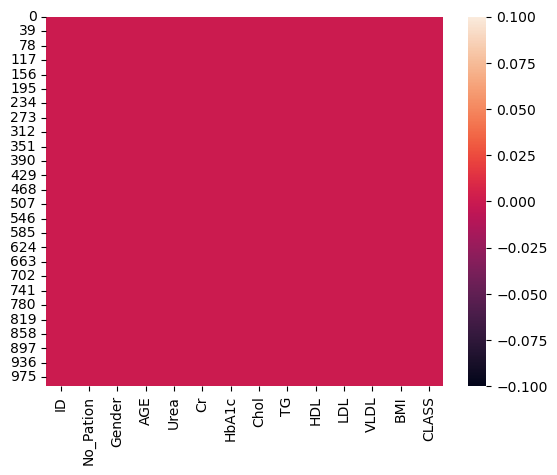

In [94]:
sb.heatmap(diabetes.isna())

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

Text(0.5, 1.0, 'BMI')

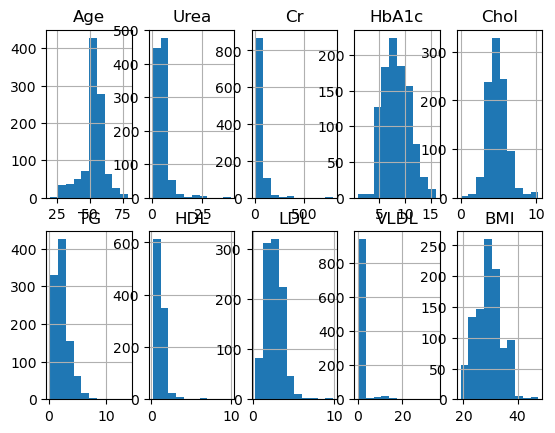

In [95]:
plt.subplot(2,5,1)
diabetes['AGE'].hist()
plt.title('Age')

plt.subplot(2,5,2)
diabetes['Urea'].hist()
plt.title('Urea')

plt.subplot(2,5,3)
diabetes['Cr'].hist()
plt.title('Cr')

plt.subplot(2,5,4)
diabetes['HbA1c'].hist()
plt.title('HbA1c')

plt.subplot(2,5,5)
diabetes['Chol'].hist()
plt.title('Chol')

plt.subplot(2,5,6)
diabetes['TG'].hist()
plt.title('TG')

plt.subplot(2,5,7)
diabetes['HDL'].hist()
plt.title('HDL')

plt.subplot(2,5,8)
diabetes['LDL'].hist()
plt.title('LDL')

plt.subplot(2,5,9)
diabetes['VLDL'].hist()
plt.title('VLDL')

plt.subplot(2,5,10)
diabetes['BMI'].hist()
plt.title('BMI')

Text(0.5, 1.0, 'BMI')

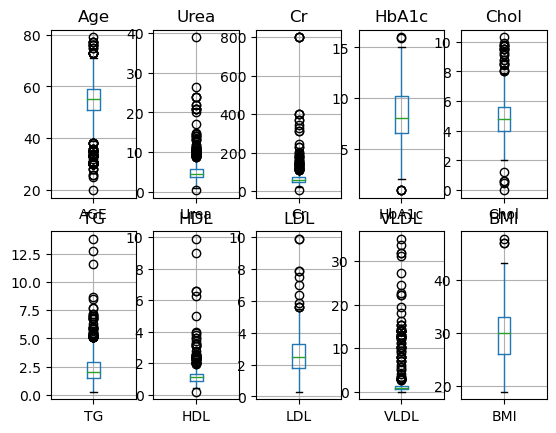

In [96]:
plt.subplot(2,5,1)
diabetes.boxplot(column=['AGE'])
plt.title('Age')

plt.subplot(2,5,2)
diabetes.boxplot(column=['Urea'])
plt.title('Urea')

plt.subplot(2,5,3)
diabetes.boxplot(column=['Cr'])
plt.title('Cr')

plt.subplot(2,5,4)
diabetes.boxplot(column=['HbA1c'])
plt.title('HbA1c')

plt.subplot(2,5,5)
diabetes.boxplot(column=['Chol'])
plt.title('Chol')

plt.subplot(2,5,6)
diabetes.boxplot(column=['TG'])
plt.title('TG')

plt.subplot(2,5,7)
diabetes.boxplot(column=['HDL'])
plt.title('HDL')

plt.subplot(2,5,8)
diabetes.boxplot(column=['LDL'])
plt.title('LDL')

plt.subplot(2,5,9)
diabetes.boxplot(column=['VLDL'])
plt.title('VLDL')

plt.subplot(2,5,10)
diabetes.boxplot(column=['BMI'])
plt.title('BMI')
# It looks like there are significant outliers in the Creatinine, Urea, and LDL columns
# Upon further investigation, creatinine levels can be at 800 if patient has nephropathy (kidney failure), so these are not considered outliers


In [124]:
diabetes['HbA1c'].describe()
diabetes[diabetes['HbA1c'] > 12]['CLASS'].value_counts

# HbA1c levels: <= 6.5 is Normal
#               6.5-7.6 is Pre-diabetic
#               > 7.6 is Diabetic

Y     76
Y      1
Name: CLASS, dtype: int64

count    1000.000000
mean        5.124743
std         2.935165
min         0.500000
25%         3.700000
50%         4.600000
75%         5.700000
max        38.900000
Name: Urea, dtype: float64


<AxesSubplot:>

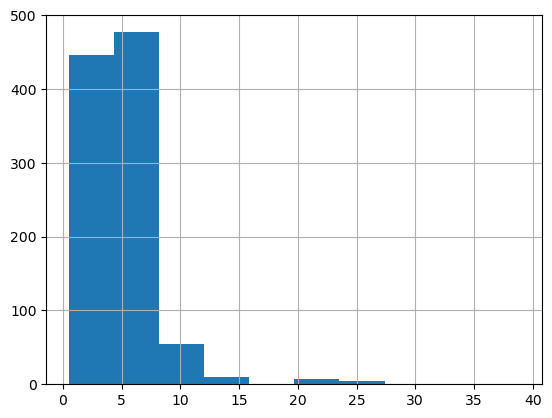

In [130]:
print(diabetes['Urea'].describe())
diabetes['Urea'].hist()
# sb.barplot(x=diabetes['CLASS'], y=diabetes['Urea'])

In [22]:
diabetes[diabetes['Urea'] > 25]

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
884,46,9963,M,51,38.9,58,6.8,5.9,2.6,1.4,3.4,1.2,33.0,Y
892,55,2345,M,55,26.4,228,7.1,4.1,1.9,1.3,2.0,0.9,27.0,Y


In [3]:
diabetes[['Urea', 'Cr']].corr()

# There is a pretty significant correlation between Urea and Creatinine levels, which is expected since both are kidney function indicators.

,Urea,Cr
Urea,1.000000,0.624134
Cr,0.624134,1.000000


Overall, there does not appear to be any outliers in this dataset. All values, even if they appear to be, are valid test results for the respective tests. What appeared to be outliers for creatinine were patients with kidney failure (a common side effect from diabetes). The apparent outliers for HbA1c levels and urea were the same. All were within the limits of the tests and are particularly indicative of diabetic patients.

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [101]:
diabetes['ID'].describe()
diabetes['ID'].nunique()
diabetes['ID'].isna().sum()
diabetes['ID'].duplicated().sum()
diabetes.duplicated().sum()
diabetes_dup = diabetes[diabetes.duplicated(subset='ID', keep=False)]
diabetes_dup.nunique()


ID           200
No_Pation    377
Gender         3
AGE           49
Urea          86
Cr            93
HbA1c         90
Chol          62
TG            56
HDL           25
LDL           49
VLDL          38
BMI           39
CLASS          4
dtype: int64

In [99]:
diabetes[diabetes.duplicated(subset=['ID'])].nunique()

ID           200
No_Pation    186
Gender         3
AGE           39
Urea          67
Cr            69
HbA1c         63
Chol          56
TG            48
HDL           22
LDL           47
VLDL          26
BMI           25
CLASS          3
dtype: int64

Looking into these 200 duplicate ID's, it looks like the same patients returned for re-testing after a few years, causing duplicate ID's, but not duplicated rows. Since these are valid results, only from returning patients, I will keep these values.

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [44]:
diabetes['Gender'].value_counts()

M    565
F    434
f      1
Name: Gender, dtype: int64

In [43]:
diabetes['CLASS'] = diabetes['CLASS'].str.strip()
diabetes.CLASS.value_counts()

Y    844
N    103
P     53
Name: CLASS, dtype: int64

In [46]:
diabetes['Gender'] = diabetes['Gender'].str.upper()
diabetes.Gender.value_counts()

M    565
F    435
Name: Gender, dtype: int64

In [49]:
diabetes = diabetes.rename(columns={
    'CLASS': 'Class',
    'AGE': 'Age'
})
diabetes.head()

,ID,No_Pation,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


There were entry issues in the categorical columns of Gender and Class. I fixed the Class column by stripping the values of excess spaces. I fixed the Gender column by upper-casing all values. I then fixed the column titles of Class and Age so they were not in all caps.

In [50]:
diabetes.to_csv('diabetes_clean.csv')

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? 
    No. I did not find outliers. 
2. Did the process of cleaning your data give you new insights into your dataset? 
    It did. I learned that patients returned to retake their bloodwork.
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations? 
    I want to make sure I visualize diabetes results in relation with most of the test values to make sure they correlate correctly based on what I've learned about each of the blood tests.